<a href="https://colab.research.google.com/github/jaafar19/NLP/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2025-04-01 11:44:24--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  8.36MB/s    in 0.4s    

2025-04-01 11:44:25 (8.36 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(1)


from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split


In [3]:
df_ = pd.read_csv('AirlineTweets.csv')
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df = df_[['airline_sentiment','text']]
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

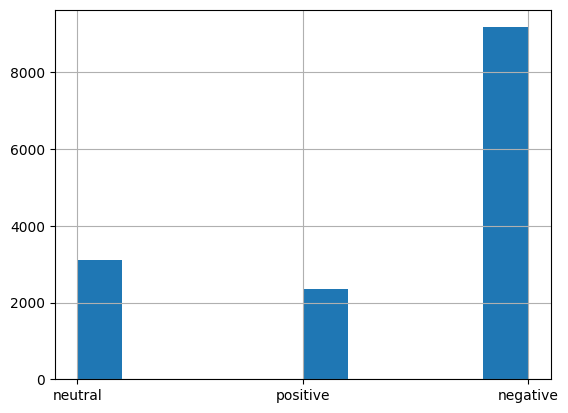

In [5]:
df['airline_sentiment'].hist()

In [6]:
target_map = {'negative':0, 'neutral':2, 'positive':1}
df['target'] = df['airline_sentiment'].map(target_map)
df.head()

<ipython-input-6-dac1d3ee61d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['airline_sentiment'].map(target_map)


,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [7]:
df_train, df_test = train_test_split(df)

In [8]:
df_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [9]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])


X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 157851 stored elements and shape (10980, 2000)>

In [10]:
X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 52208 stored elements and shape (3660, 2000)>

In [11]:
Y_train = df_train['target']
Y_test = df_test['target']

In [12]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)

print('Train acc', model.score(X_train, Y_train))
print('Test acc', model.score(X_test, Y_test))

Train acc 0.8549180327868853
Test acc 0.7991803278688525


In [15]:
Pr_train = model.predict_proba(X_train)
Pr_test = model.predict_proba(X_test)
print('Train AUC', roc_auc_score(Y_train, Pr_train, multi_class='ovo'))
print('Test AUC', roc_auc_score(Y_test, Pr_test, multi_class='ovo'))

Train AUC 0.9429477299894263
Test AUC 0.8951758857131157


In [16]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [18]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm
cm

array([[0.96486133, 0.00827646, 0.0268622 ],
       [0.19909502, 0.70022624, 0.10067873],
       [0.30107527, 0.05204301, 0.64688172]])

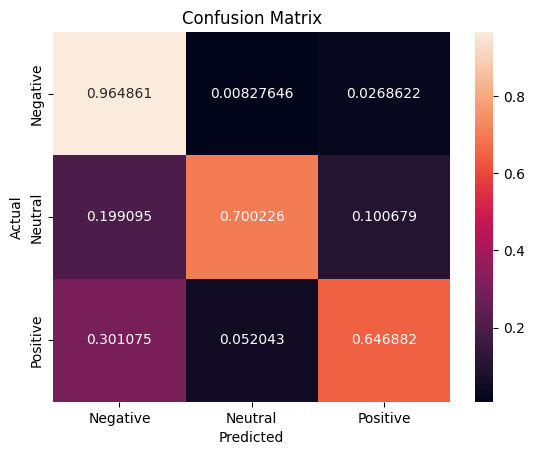

In [19]:
def plot_confusion_matrix(cm):
  classes = ['Negative', 'Neutral', 'Positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')
  plt.show()

plot_confusion_matrix(cm)

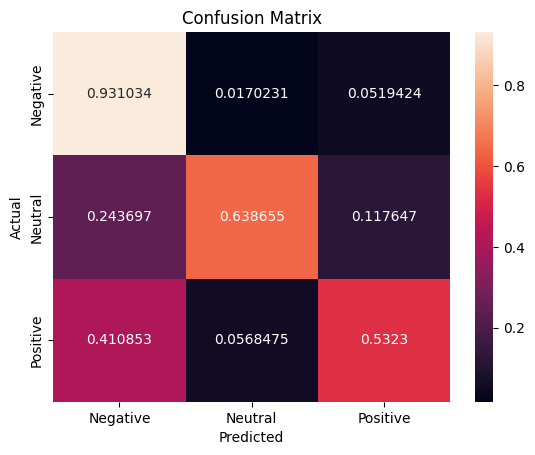

In [20]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_confusion_matrix(cm_test)

In [21]:
binary_target_list = [target_map['positive'], target_map['negative']]
df_binary_train = df_train[df_train['target'].isin(binary_target_list)]
df_binary_test = df_test[df_test['target'].isin(binary_target_list)]

In [22]:
df_binary_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [23]:
X_train = vectorizer.fit_transform(df_binary_train['text'])
X_test = vectorizer.transform(df_binary_test['text'])

Y_train = df_binary_train['target']
Y_test = df_binary_test['target']

In [27]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)

print('Train acc', model.score(X_train, Y_train))
print('Test acc', model.score(X_test, Y_test))

Train acc 0.9298671288272675
Test acc 0.9144144144144144


In [28]:
Pr_train = model.predict_proba(X_train)[:,1]
Pr_test = model.predict_proba(X_test)[:,1]

print('Train AUC', roc_auc_score(Y_train, Pr_train))
print('Test AUC', roc_auc_score(Y_test, Pr_test))

Train AUC 0.9788541037708268
Test AUC 0.953128610676047


In [29]:
model.coef_

array([[-0.24937201, -0.13313141, -0.34631635, ...,  0.5090778 ,
         0.0189375 , -0.60381769]])

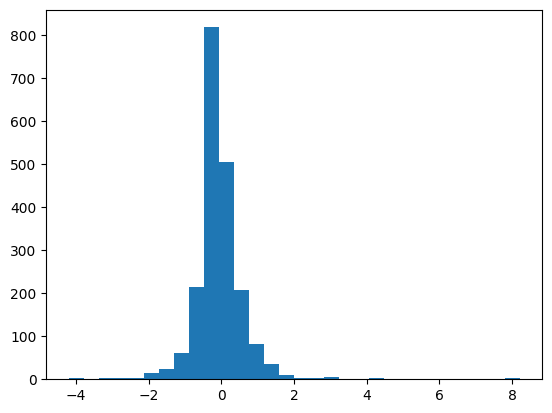

In [30]:
plt.hist(model.coef_[0], bins=30);

In [31]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'united': np.int64(1845),
 'change': np.int64(342),
 'made': np.int64(1093),
 'in': np.int64(943),
 'just': np.int64(994),
 'over': np.int64(1276),
 'hours': np.int64(907),
 'for': np.int64(755),
 'something': np.int64(1623),
 'that': np.int64(1729),
 'should': np.int64(1579),
 'have': np.int64(858),
 'taken': np.int64(1703),
 'online': np.int64(1250),
 'am': np.int64(138),
 'not': np.int64(1217),
 'loved': np.int64(1082),
 'the': np.int64(1731),
 'agent': np.int64(109),
 'though': np.int64(1747),
 'designed': np.int64(528),
 'door': np.int64(578),
 'to': np.int64(1767),
 'half': np.int64(836),
 'into': np.int64(969),
 'plane': np.int64(1336),
 'seat': np.int64(1539),
 'be': np.int64(237),
 'forced': np.int64(756),
 'always': np.int64(137),
 'sit': np.int64(1595),
 'here': np.int64(880),
 'americanair': np.int64(142),
 '11': np.int64(6),
 'out': np.int64(1271),
 'of': np.int64(1231),
 'delayed': np.int64(506),
 'flights': np.int64(738),
 'you': np.int64(1993),
 'suck': np.int64(1675),

In [34]:
threshold = 1
print ('most positive words:')
for word, index in word_index_map.items():
  if model.coef_[0][index] > threshold:
    print (word, model.coef_[0][index])

most positive words:
made 1.6273323572174545
just 1.2617657925757724
loved 1.1976548464175796
always 1.4515203134509798
southwestair 2.8986611614678615
got 1.3159988601451031
nice 1.9429566966386103
thank 8.125361177220622
airline 1.150851225750354
great 5.202027747551474
all 1.1722302510960128
so 1.1614063200115219
follow 1.5487500390506717
best 3.61974152992375
virginamerica 3.208642874073822
thx 2.8326981125845547
co 1.4290232624847525
jetblue 2.9045128382310463
good 3.239324031633899
she 1.1254669675601445
thanks 8.208827427327686
crew 1.4725571121319654
well 1.716005914747327
haha 1.2018807061733232
done 1.0656390107319824
will 1.1381625184837856
love 4.387399402926937
chicago 1.1817164210504578
excited 1.3502284005323886
able 1.1917231684532446
free 1.1788460511234218
appreciate 2.9509137042592997
flying 1.1429380363215225
much 1.3932700324726068
beyond 1.0015708304737079
forward 1.3696817466594966
worked 1.199993980231983
awesome 4.103465480704713
cool 2.1532699849953003
newark 

In [35]:
print ('most negative words:')
for word, index in word_index_map.items():
  if model.coef_[0][index] < -threshold:
    print (word, model.coef_[0][index])

most negative words:
over -1.0851224448121752
hours -3.1762048916439394
should -1.0511884844131734
have -1.0793366500695594
online -1.2186622655592814
not -4.2076984217857865
half -1.042911097628411
delayed -2.7228753939017096
suck -1.189688710265251
usairways -1.7419651240719005
stuck -1.730027845864838
need -1.2506353268539252
flight -1.416244833014592
on -1.0009591668445936
phone -1.2647597825549468
or -1.207402308795669
your -1.228295870560161
hour -2.0608523611697276
is -1.8882479764723181
site -1.255071370163278
but -2.2140290307781374
how -1.8144185145464595
does -1.335748512525692
cancelled -2.6626029520818846
can -1.6980006912318366
miss -1.1833935772904085
now -1.0172182563545147
due -1.6912484500923781
delay -1.9339509864719373
nothing -2.114169338679166
being -1.0970598666937277
what -1.9997555695094897
bag -1.5444081482526553
broken -1.1276091615138457
an -1.4761919870552453
call -1.8552812697706218
trying -1.454644019336309
system -1.564914557701099
still -1.2549841956976